# Quantum Simulation of a free particle in 1D

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from scipy import signal


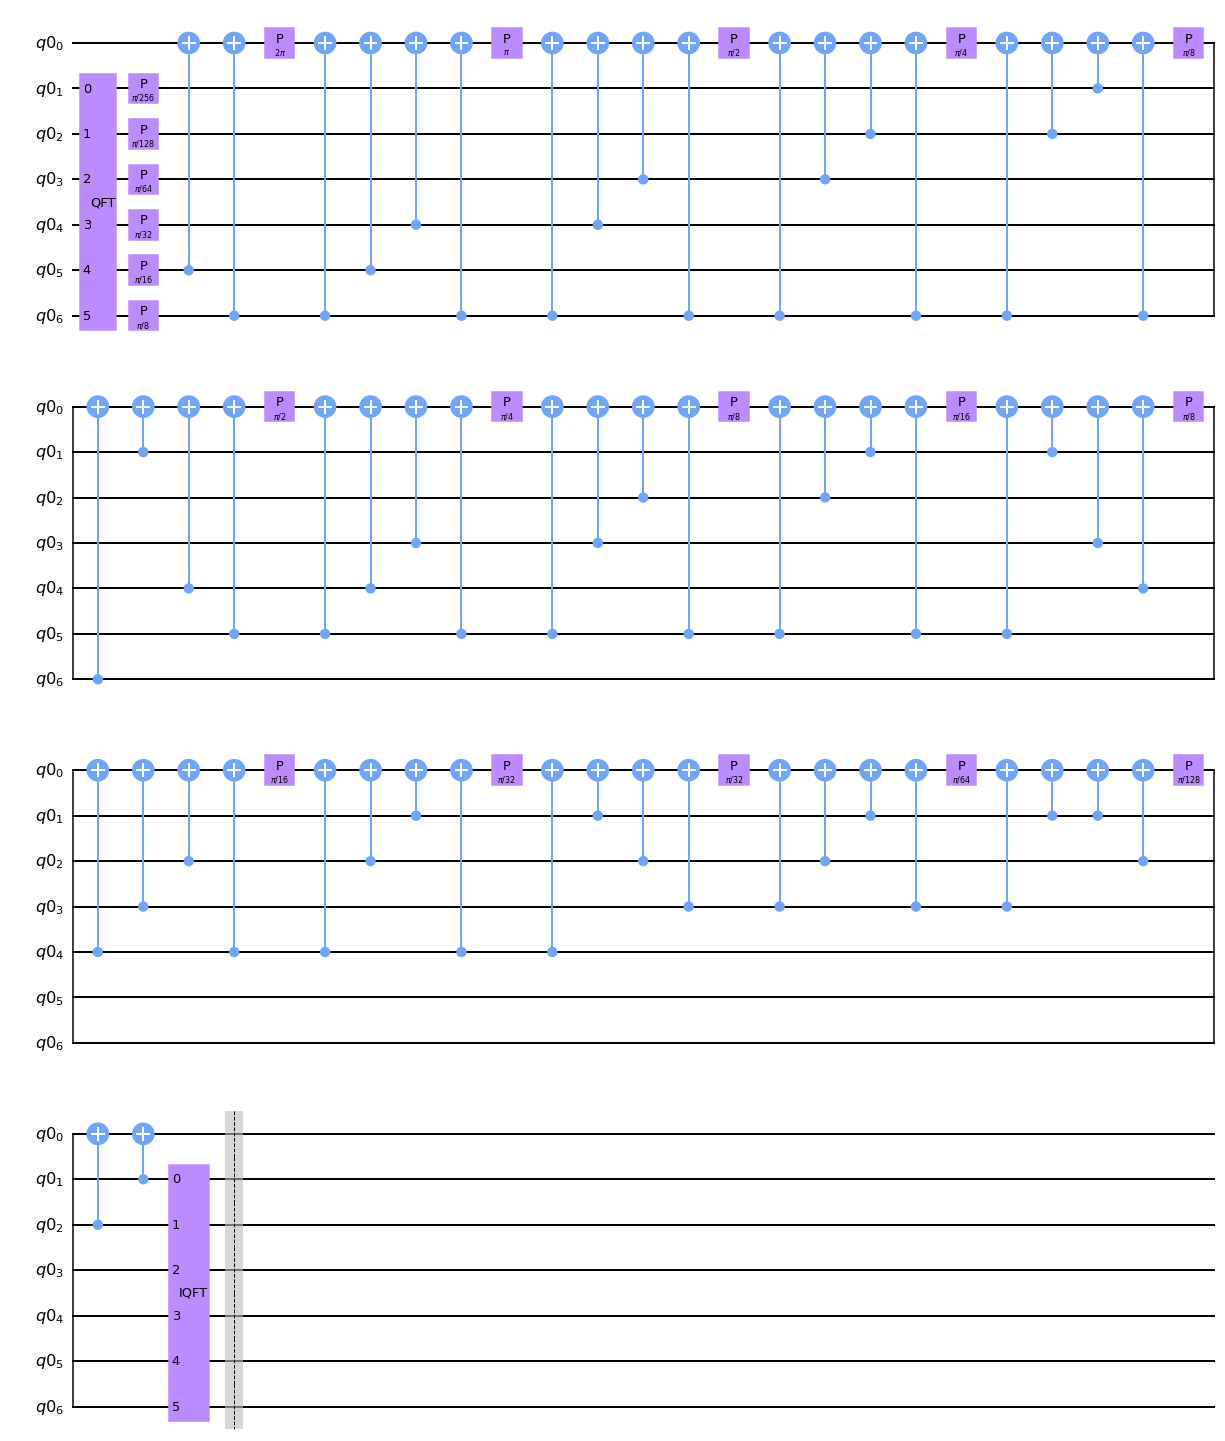

In [4]:
n=6
phi=np.pi
qubits=QuantumRegister(n+1)
splitOp=QuantumCircuit(qubits,name="splitOp")


splitOp.append(QFT(6),qubits[1:])

for i in range(n):
    splitOp.p(phi/2**(n-3+i), n-i)
for i in range(n):
    for j in range(i+1,n):
        splitOp.cx(n-j,0)
        splitOp.cx(n-i,0)
        splitOp.p(phi*(2**(2-i-j)),0)
        splitOp.cx(n-i,0)
        splitOp.cx(n-j,0)

splitOp.append(QFT(n,inverse=True),qubits[1:]) #inverse QFT
splitOp.barrier()
splitOp.draw('mpl')

Wave function  with delta distribution:

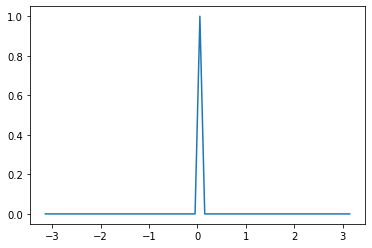

In [5]:
length = 2**6

psi = signal.unit_impulse(length,length//2)
x = np.linspace(-np.pi,np.pi,2**6)
plt.plot(x, psi)

time evolution with Trotter steps:

In [6]:
n=6

q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)

circuit.initialize(psi,q[1:])
circuit.barrier()

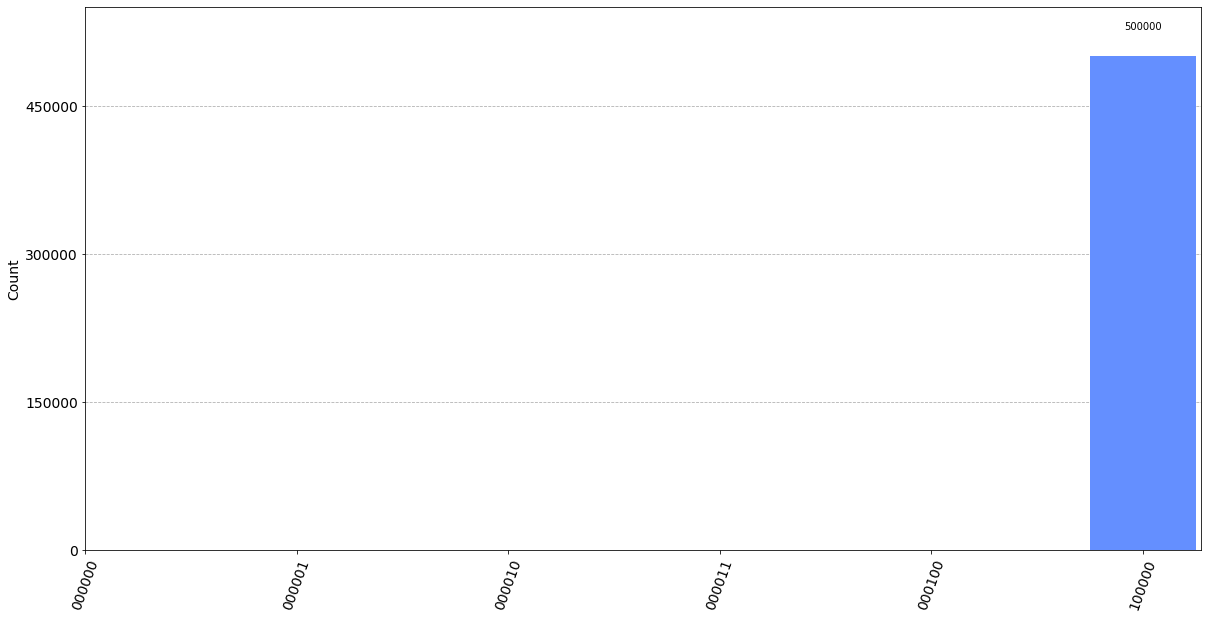

In [7]:

trotter_steps = 0 
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

n=1

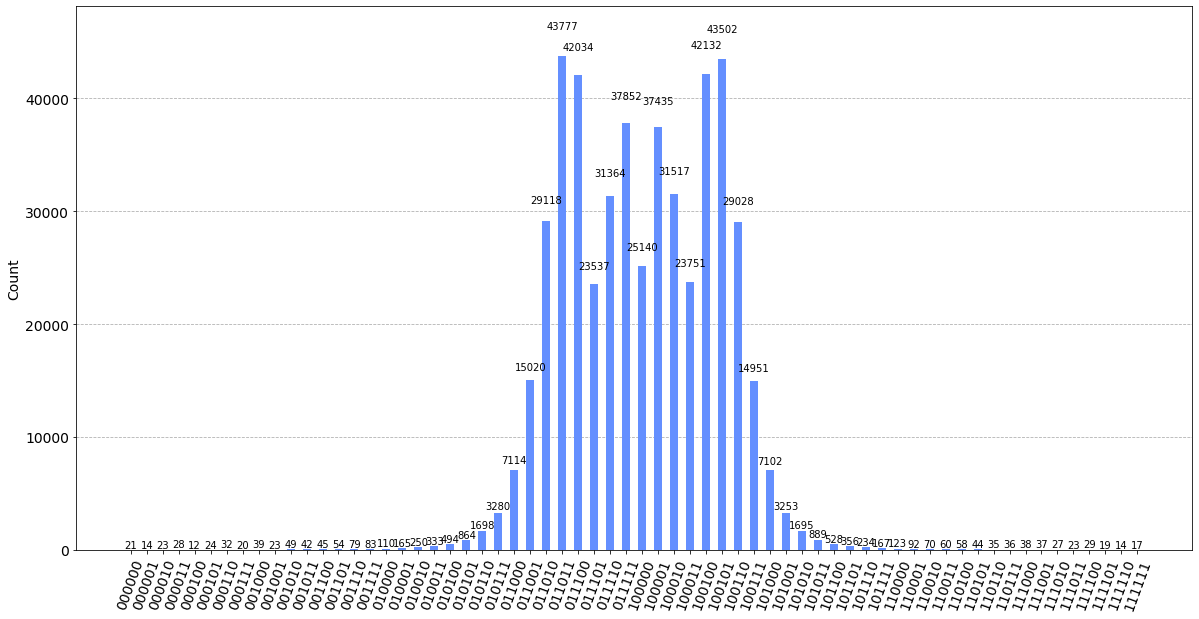

In [9]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 1 
for i in range(trotter_steps):
     circuit.append(splitOp,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

n=2

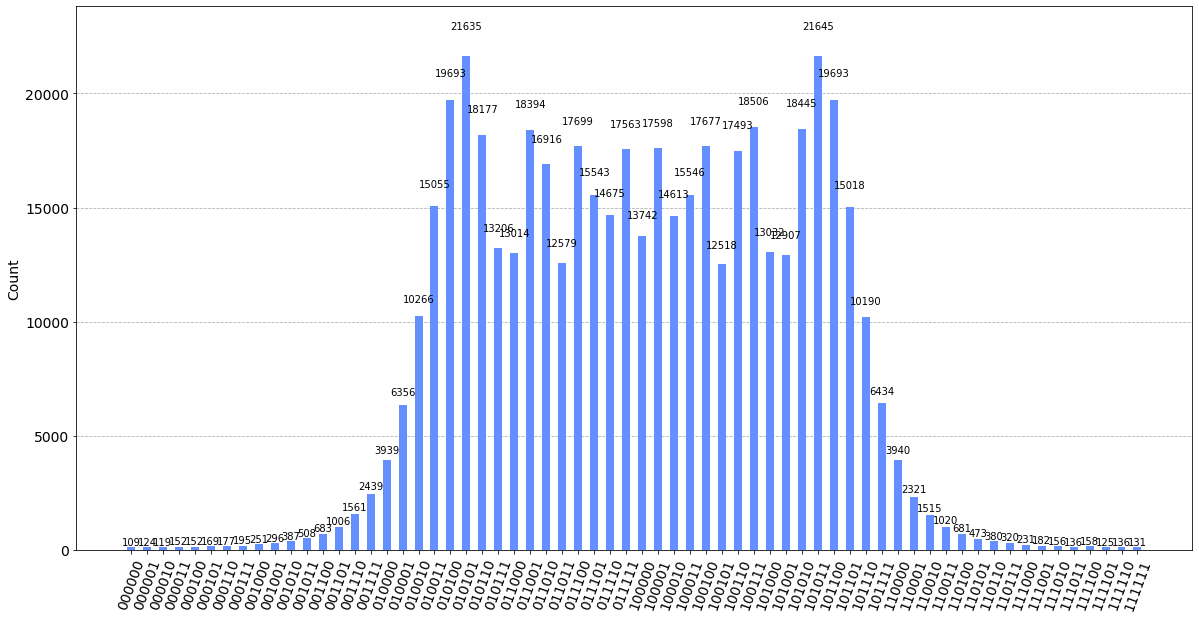

In [10]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 2
for i in range(trotter_steps):
     circuit.append(splitOp,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

n=3

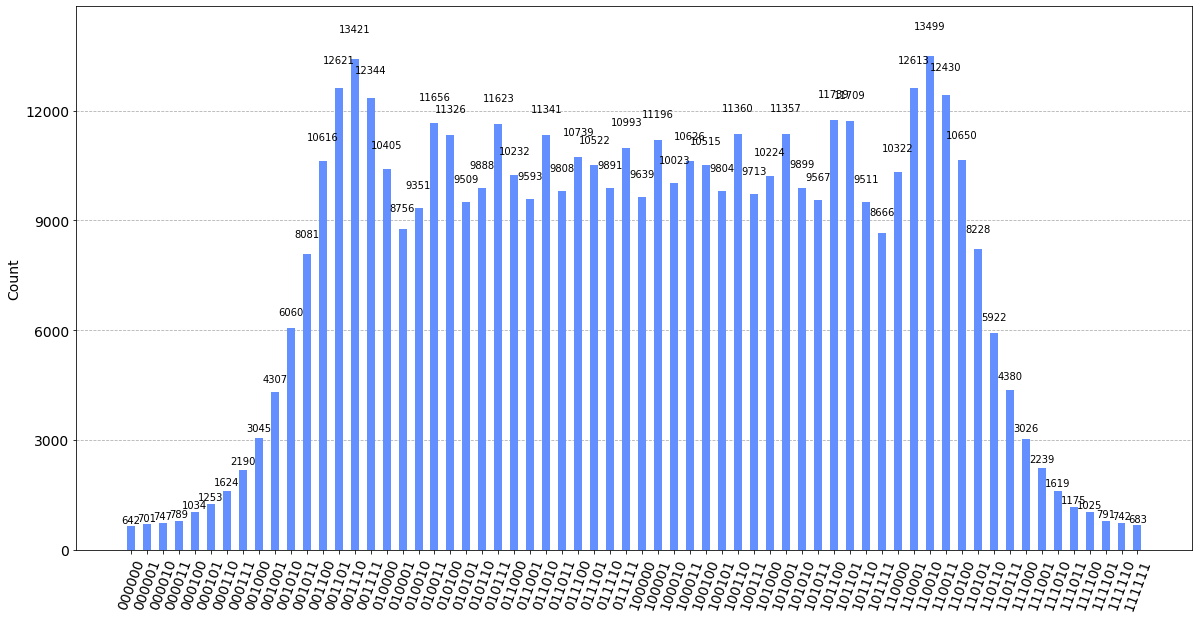

In [11]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 3
for i in range(trotter_steps):
     circuit.append(splitOp,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

n=4

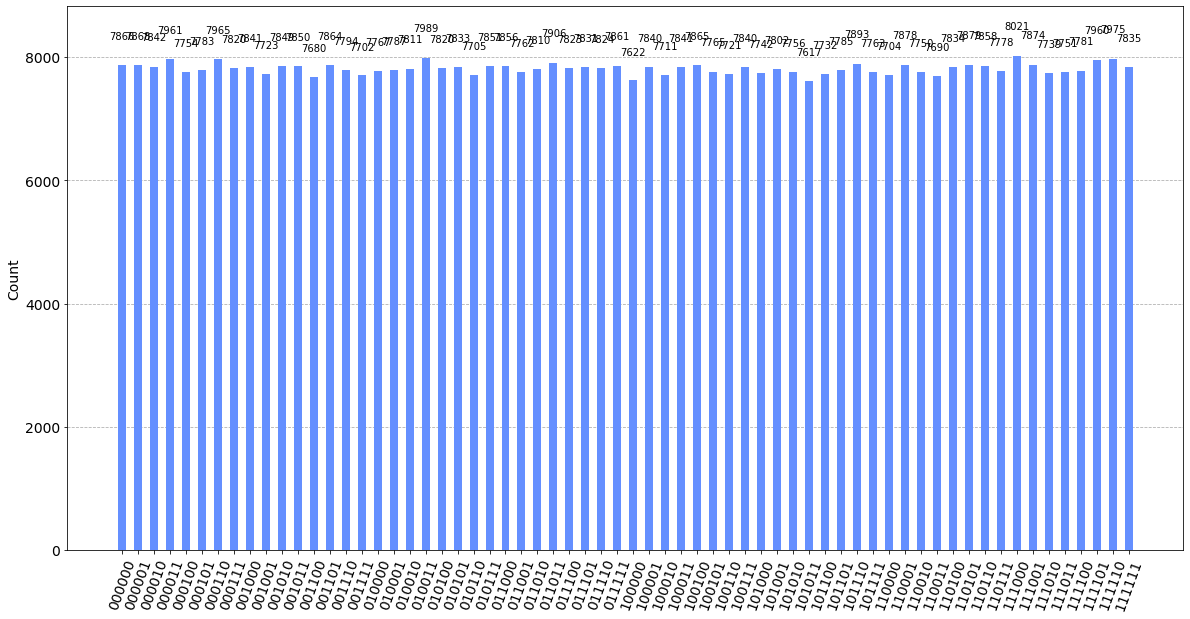

In [12]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 4
for i in range(trotter_steps):
     circuit.append(splitOp,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])